In [2]:
import numpy as np
import pandas as pd
import urllib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
%matplotlib inline
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.linear_model import LinearRegression as Lin_Reg

import urllib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab

from mpl_toolkits.basemap import Basemap
import itertools
import plotly.plotly as py
import sys
import csv
import pycountry

from iso3166 import countries

## 1. Disease data
**1.1 Loading disease data**

Datasets on incidence of non-communicable diseases were downloaded from the World Health Organization website (http://apps.who.int/gho/data/node.main.A859?lang=en). They are then loaded here.

In [136]:
### Load disease data

## Read cancer data
df_cancer = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/WHS2_131 Cancer.csv', delimiter=',')
# Convert column names to lowercase
df_cancer.columns = map(str.lower, df_cancer.columns)
# Rename columns
df_cancer = df_cancer.rename(columns = {' both sexes':'cancer_all'})
df_cancer = df_cancer.rename(columns = {' female':'cancer_female'})
df_cancer = df_cancer.rename(columns = {' male':'cancer_male'})

## Read cardiovascular data
df_cardio = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/WHS2_131 Cardiovascular.csv', delimiter=',')
# Convert column names to lowercase
df_cardio.columns = map(str.lower, df_cardio.columns)
# Rename columns
df_cardio = df_cardio.rename(columns = {' both sexes':'cardio_all'})
df_cardio = df_cardio.rename(columns = {' female':'cardio_female'})
df_cardio = df_cardio.rename(columns = {' male':'cardio_male'})

## Read diabetes data
df_diabetes = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/WHS2_131 Diabetes.csv', delimiter=',')
# Convert column names to lowercase
df_diabetes.columns = map(str.lower, df_diabetes.columns)
# Rename columns
df_diabetes = df_diabetes.rename(columns = {' both sexes':'diabetes_all'})
df_diabetes = df_diabetes.rename(columns = {' female':'diabetes_female'})
df_diabetes = df_diabetes.rename(columns = {' male':'diabetes_male'})

**1.2 Select year 2012 for all three datasets **

We want to work with the most recent data. We are anticipating disease prevalence will be our outcome variable, so we want to see how food consumption predicts future disease prevalence.

In [137]:
# Filter observations for year 2012, for each dataset.
df_cancer_2012 = df_cancer[df_cancer['year'] == 2012]
df_cardio_2012 = df_cardio[df_cardio['year'] == 2012]
df_diabetes_2012 = df_diabetes[df_cancer['year'] == 2012]

## 2. Food data
**2.1 Load food data **

xxx Did we make any edits to the original data before loading?

In [14]:
### Load food data
df_foodgrouped = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/Foodsupply_by_group.csv', delimiter=',')

**2.2 Explore data **

2.2.1 Columns

In [15]:
# Rename AreaName to country
df_foodgrouped = df_foodgrouped.rename(columns = {'AreaName':'country'})
# Show column names
df_foodgrouped.columns

Index([u'Domain Code', u'Domain', u'AreaCode', u'country', u'ElementCode',
       u'ElementName', u'ItemCode', u'ItemName', u'Year', u'Value', u'Flag',
       u'FlagD'],
      dtype='object')

2.2.2 Food categories

This is the list of food categories according to FAO.

In [16]:
# Show unique food categories
df_foodgrouped['ItemName'].unique()

array(['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar & Sweeteners',
       'Pulses', 'Treenuts', 'Oilcrops', 'Vegetable Oils', 'Vegetables',
       'Fruits - Excluding Wine', 'Stimulants', 'Spices',
       'Alcoholic Beverages', 'Miscellaneous', 'Grand Total',
       'Vegetal Products', 'Sugar Crops', nan], dtype=object)

2.2.3 Countries

In [17]:
df_foodgrouped['country'].unique()

array(['Armenia', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Barbados', 'Belgium-Luxembourg', 'Bangladesh',
       'Bermuda', 'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'Belize', 'Solomon Islands', 'Brunei Darussalam', 'Bulgaria',
       'Myanmar', 'Cameroon', 'Canada', 'Cabo Verde',
       'Central African Republic', 'Sri Lanka', 'Chad', 'Chile',
       'China, mainland', 'Colombia', 'Congo', 'Costa Rica', 'Cuba',
       'Cyprus', 'Czechoslovakia', 'Azerbaijan', 'Benin', 'Denmark',
       'Dominica', 'Dominican Republic', 'Belarus', 'Ecuador', 'Egypt',
       'El Salvador', 'Ethiopia PDR', 'Estonia', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Djibouti', 'Georgia', 'Gabon',
       'Gambia', 'Germany', 'Bosnia and Herzegovina', 'Ghana', 'Kiribati',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 'China, Hong Kong SAR', 'Hu

In [18]:
#iso codes to find potential mismathes with df food grouped
for c in countries:
       print c

Country(name=u'Afghanistan', alpha2='AF', alpha3='AFG', numeric='004', apolitical_name=u'Afghanistan')
Country(name=u'\xc5land Islands', alpha2='AX', alpha3='ALA', numeric='248', apolitical_name=u'\xc5land Islands')
Country(name=u'Albania', alpha2='AL', alpha3='ALB', numeric='008', apolitical_name=u'Albania')
Country(name=u'Algeria', alpha2='DZ', alpha3='DZA', numeric='012', apolitical_name=u'Algeria')
Country(name=u'American Samoa', alpha2='AS', alpha3='ASM', numeric='016', apolitical_name=u'American Samoa')
Country(name=u'Andorra', alpha2='AD', alpha3='AND', numeric='020', apolitical_name=u'Andorra')
Country(name=u'Angola', alpha2='AO', alpha3='AGO', numeric='024', apolitical_name=u'Angola')
Country(name=u'Anguilla', alpha2='AI', alpha3='AIA', numeric='660', apolitical_name=u'Anguilla')
Country(name=u'Antarctica', alpha2='AQ', alpha3='ATA', numeric='010', apolitical_name=u'Antarctica')
Country(name=u'Antigua and Barbuda', alpha2='AG', alpha3='ATG', numeric='028', apolitical_name=u'An

In [24]:
import iso3166
#countries.get(df_foodgrouped['country'])
#iso3166.countries_by_alpha2
df_iso=pd.DataFrame(iso3166.countries_by_alpha2, index= ["country", "iso2", "iso3", "num", "country2"])
df_iso=df_iso[:3]
df_iso=df_iso.transpose()
df_iso.head()
#pd.DataFrame(results, columns = ['Scores', 'Number of Trees', 'Number of predictors'])

,country,iso2,iso3
AD,Andorra,AD,AND
AE,United Arab Emirates,AE,ARE
AF,Afghanistan,AF,AFG
AG,Antigua and Barbuda,AG,ATG
AI,Anguilla,AI,AIA


## 3. Initial analysis of the relation of disease and food consumption data
**3.1 Merge the data**

In order to make a first assessment of the relation between disease prevalence and previous food consumption patterns, we select calorie intake per capita per day as predictor of disease prevalence.

In [144]:
# Select variable of calories per capita per day for years between 2002 and 2011 (all food categories).
cal_pc_day = df_foodgrouped[(df_foodgrouped['ElementCode'] == 664) & (df_foodgrouped['Year'] > 2001) & (df_foodgrouped['Year'] < 2012)]
# Create list of food categories of interest
select_groups = ['Cereals', 'Sugar', 'Vegetables', 'Fruits']
# Create list of non-communicable diseases
diseases = ['cancer', 'cardio', 'diabetes']

# Create dataframes for each combination of disease and food category.
for d in diseases:
    for group in select_groups:
        locals()["cal_"+str(group)] = cal_pc_day[cal_pc_day['ItemName'].str.contains(group)]
        # Calculate the mean calorie intake percapita per day by country between 2002 and 2011, for each food category.
        locals()["cal_avg_"+str(group)] = locals()["cal_"+str(group)].groupby(['country'], as_index=False).mean()
        # Merge disease and calorie consumption data.
        locals()["cal_"+str(d)+"_"+str(group)] = pd.merge(locals()["cal_avg_"+str(group)], locals()["df_"+str(d)+"_2012"], on=['country']) 

In [145]:
# Show sample dataframe
cal_cancer_Sugar.head()

,country,AreaCode,ElementCode,ItemCode,Year,Value,iso,year,cancer_all,cancer_female,cancer_male
0,Afghanistan,2.0,664.0,2909.0,2006.5,67.9,AFG,2012,123.6,110.6,142.2
1,Albania,3.0,664.0,2909.0,2006.5,194.7,ALB,2012,123.1,105.3,142.5
2,Algeria,4.0,664.0,2909.0,2006.5,280.9,DZA,2012,80.6,78.0,83.9
3,Angola,7.0,664.0,2909.0,2006.5,129.3,AGO,2012,89.6,86.1,97.9
4,Argentina,9.0,664.0,2909.0,2006.5,468.0,ARG,2012,131.5,109.1,166.5


**3.2 Visual analysis of the relation of food consumption and disease prevalence**

This section show scatterplots of calorie consumption by food group by country (the per capita average between 2002 and 2011) versus disease prevalence in 2012. Simpmle linear regression is shown in every scatterplot.

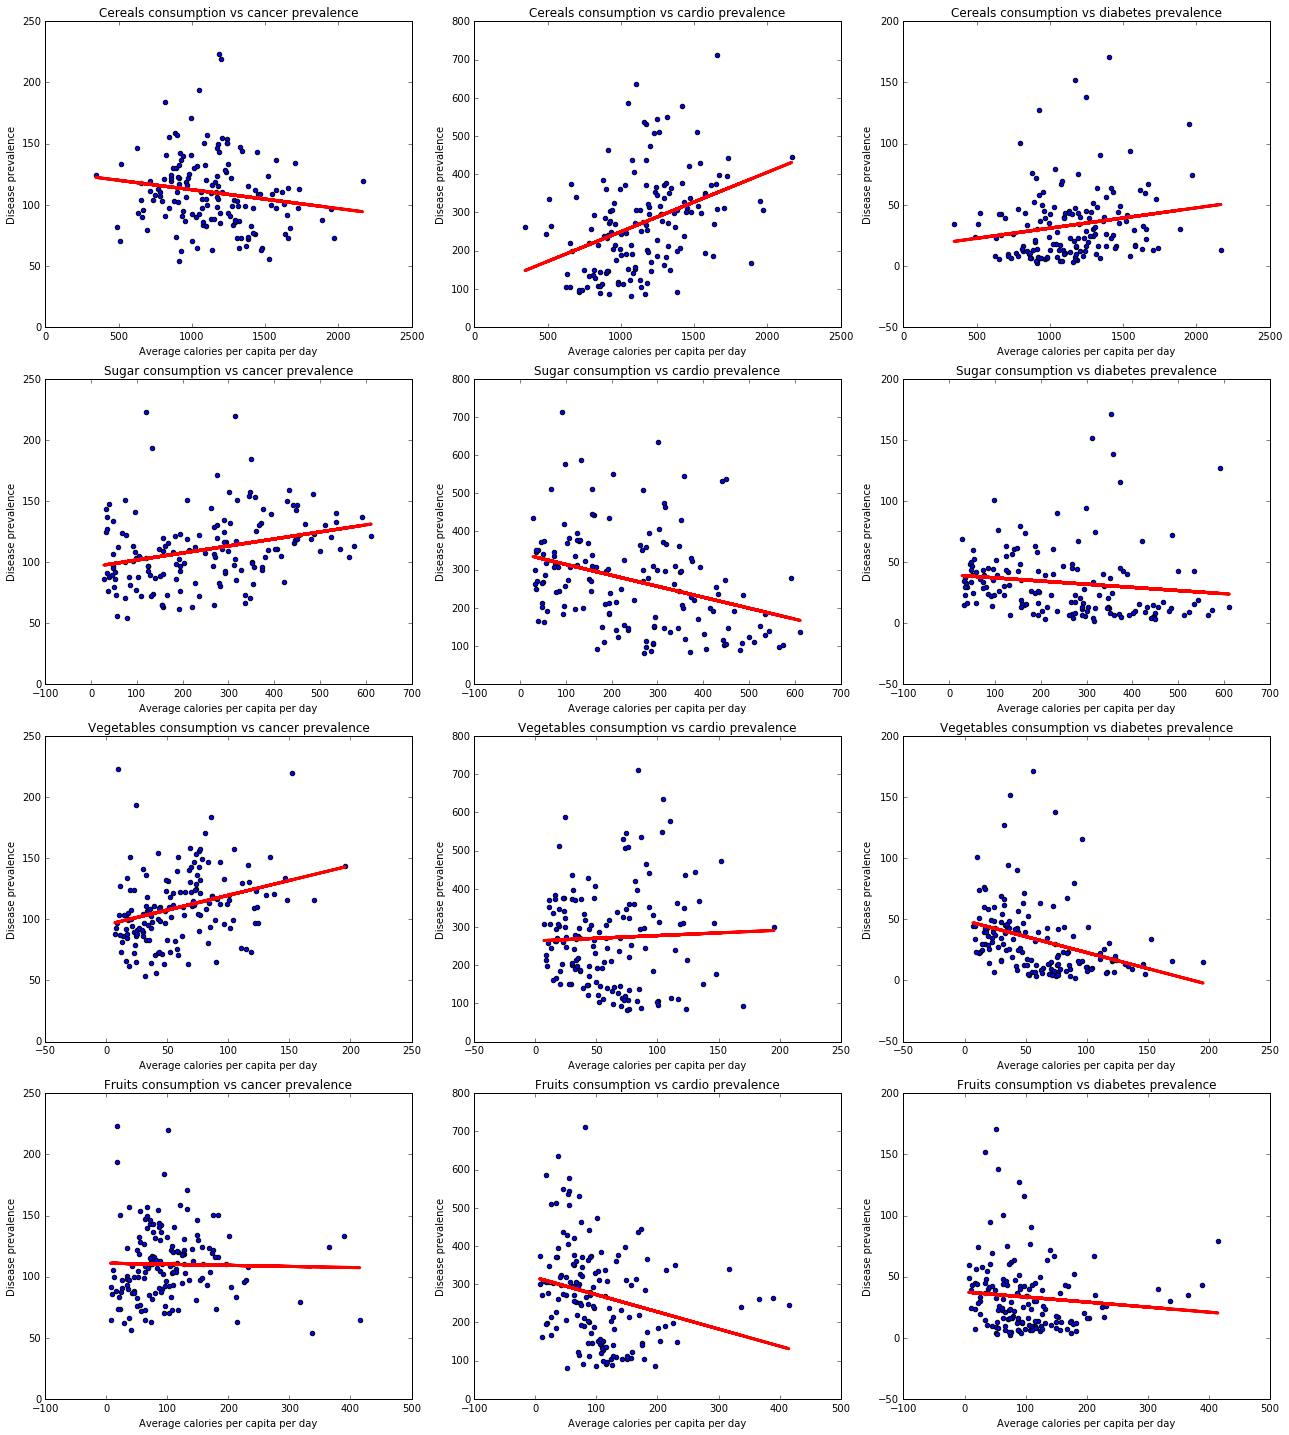

In [146]:
# Create plot
fig, ax = plt.subplots(4, 3, figsize = (18, 20))

for d in diseases:
    for group in select_groups:
        # Create x and y variables for every combination of disease and food category
        x = locals()["cal_"+str(d)+"_"+str(group)][[5]]
        y = locals()["cal_"+str(d)+"_"+str(group)][[8]]
        
        # Run and fit a linear regression
        reg = Lin_Reg()
        reg.fit(x, y)
        # Predict values for y
        y_hat = reg.predict(x)
        
        # Create scatterplots
        ax[select_groups.index(group), diseases.index(d)].scatter(x, y, c='b')
        # Add regression line
        ax[select_groups.index(group), diseases.index(d)].plot(x, y_hat, c='r', linewidth=3.0)
        # Plot formatting
        ax[select_groups.index(group), diseases.index(d)].set_title(str(group)+" consumption vs "+str(d)+" prevalence")
        ax[select_groups.index(group), diseases.index(d)].set_xlabel('Average calories per capita per day')
        ax[select_groups.index(group), diseases.index(d)].set_ylabel('Disease prevalence')
        ax[select_groups.index(group), diseases.index(d)].legend(loc='best')
        
plt.tight_layout()
plt.show()        

In [147]:
###----------Part 2: Merging with GDP Data ----------###

# GDP per capita data including healthcare expenditure and mortality rate from WDI data
df_gdppc = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/WDI_Extended_Added_Indicators.csv', delimiter=',')
df_gdppc.columns = map(str.lower, df_gdppc.columns)
df_gdppc = df_gdppc.rename(columns = {'countryname':'country'})


#merge disease data - only for 2000 and 2012 with gdp
data_diseases = pd.merge(df_cancer, df_gdppc, on=['iso', 'year'])
data_diseases = pd.merge(df_cardio, data_diseases, on=['iso', 'year'])
data_diseases = pd.merge(df_diabetes, data_diseases, on=['iso', 'year'])
del data_diseases['country_x'] #extra country column from mergers
data_diseases = data_diseases.rename(columns = {'country_y':'country'})
data_diseases.shape

(340, 19)

In [ ]:
#old merge code
#print df_gdppc.shape
#df_gdppc.head()


#merge disease data
#data_diseases = pd.merge(df_gdppc, df_cancer, how="outer", on=['country', 'year'], indicator = True)
#data_diseases = data_diseases.rename(columns = {'_merge':'_merge1'})
#data_diseases = pd.merge(data_diseases, df_cardio, how="outer", on=['country', 'year'],indicator=True)
#data_diseases = data_diseases.rename(columns = {'_merge':'_merge2'})
#data_diseases = pd.merge(data_diseases, df_diabetes, how="outer", on=['country', 'year'], indicator=True)

#now it's adding years other than 2012 and 2010
#x=data_diseases[(data_diseases["_merge"]=="both" & data_diseases_2012["_merge1"]=="both" & data_diseases_2012["_merge2"]=="both" )
#data_diseases.head()

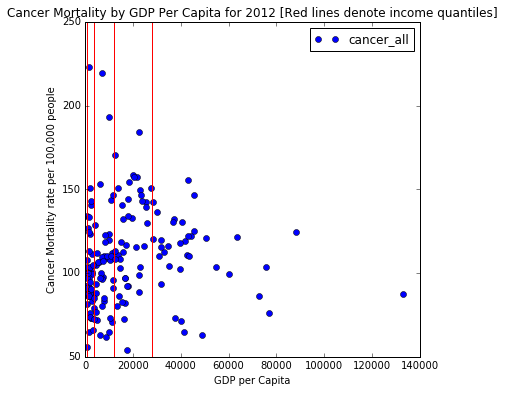

In [148]:
#Plot of disease and income quartiles [not included in the milestone but will be used in the future]
#scatter plotting income and cancer_all for 2012 with red lines on income quartile
#to refine the graph - 1) we will ensure the merged data for 2012 is crosschecked and correct 2) and we will
#cut outliers from the graphs to refine the fit and trends 

#cancer vs gdp per capita
data_diseases_2012=data_diseases[data_diseases["year"]==2012]
y=data_diseases_2012["cancer_all"]
x=data_diseases_2012["ny_gdp_pcap_pp_kd"]

x1=x.values
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
perc = mlab.prctile(x1, p=p)

fig, ax = plt.subplots(1,1, figsize=(6, 6))
plt.plot(x, y, 'o', c="b")

#add red lines for income quantiles
for i in perc:
    plt.axvline(x=i, linewidth=1, c="r")

plt.xlabel('GDP per Capita')
plt.ylabel('Cancer Mortality rate per 100,000 people')
plt.title('Cancer Mortality by GDP Per Capita for 2012 [Red lines denote income quantiles]')
plt.legend(loc='best')  

plt.show()

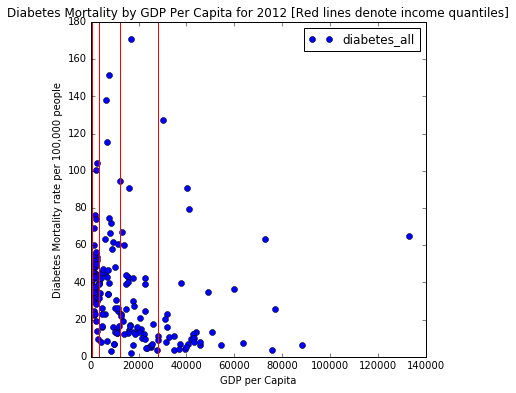

In [149]:
#diabetes vs gdp per capita

y=data_diseases_2012["diabetes_all"]
x=data_diseases_2012["ny_gdp_pcap_pp_kd"]

x1=x.values
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
perc = mlab.prctile(x1, p=p)

fig, ax = plt.subplots(1,1, figsize=(6, 6))
plt.plot(x, y, 'o', c="b")

#add red lines for income quantiles
for i in perc:
    plt.axvline(x=i, linewidth=1, c="r")

plt.xlabel('GDP per Capita')
plt.ylabel('Diabetes Mortality rate per 100,000 people')
plt.title('Diabetes Mortality by GDP Per Capita for 2012 [Red lines denote income quantiles]')
plt.legend(loc='best')  

plt.show()

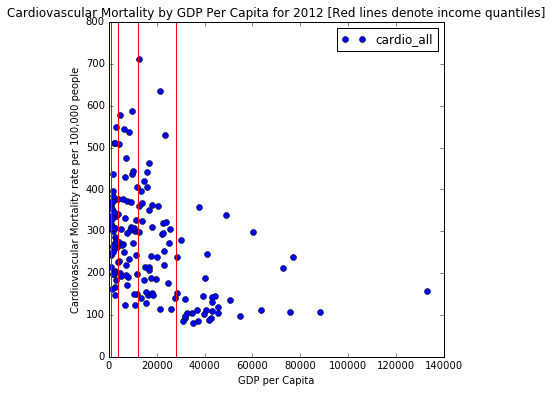

In [150]:
#cardio vs gdp per capita

y=data_diseases_2012["cardio_all"]
x=data_diseases_2012["ny_gdp_pcap_pp_kd"]

x1=x.values
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
perc = mlab.prctile(x1, p=p)

fig, ax = plt.subplots(1,1, figsize=(6, 6))
plt.plot(x, y, 'o', c="b")

#add red lines for income quantiles
for i in perc:
    plt.axvline(x=i, linewidth=1, c="r")

plt.xlabel('GDP per Capita')
plt.ylabel('Cardiovascular Mortality rate per 100,000 people')
plt.title('Cardiovascular Mortality by GDP Per Capita for 2012 [Red lines denote income quantiles]')
plt.legend(loc='best')  

plt.show()

In [151]:
###----------Part 3: MAPPING  ----------###
#PART 3.A CANCER prevalence worldwide
import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1') #plotly requires login, can be used by any user

data = [ dict(
        type = 'choropleth',
        locations = df_cancer_2012['iso'], #the map works by iso code
        z = df_cancer_2012['cancer_all'], #variable of intensity - cancer prevalence
        text = df_cancer_2012['country'], #hover-over label of country
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Cancer Mortality All'), #colob bar legend
      ) ]

layout = dict(
    title = '2012 Cancer Mortality Rate Source: WHO',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [152]:
#PART 3.B DIABETES
import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = df_diabetes_2012['iso'],
        z = df_diabetes_2012['diabetes_all'],
        text = df_diabetes_2012['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Diabetes Mortality All'),
      ) ]

layout = dict(
    title = '2012 Diabetes Mortality Rate Source: WHO',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [153]:
#PART 3.C CARDIOVASCULAR
import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = df_cardio_2012['iso'],
        z = df_cardio_2012['cardio_all'],
        text = df_cardio_2012['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Cardiovascular Mortality All'),
      ) ]

layout = dict(
    title = '2012  Cardiovascular Mortality Rate Source: WHO',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [154]:
#PART 3.D SUGAR CONSUMPTION
#newly added consumption map per food type - was not included in mileston 3 but may be used going forward

import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = cal_cancer_Sugar['iso'],
        z = cal_cancer_Sugar["Value"],
        text = cal_cancer_Sugar['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Calorie per day sugar consumption [average 2001-2011]'),
      ) ]

layout = dict(
    title = 'Average Sugar Consumption 2001-2012',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [155]:
#PART 3.E VEGETABLES CONSUMPTION
#newly added consumption map per food type - was not included in mileston 3 but may be used going forward

import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = cal_cancer_Vegetables['iso'],
        z = cal_cancer_Vegetables["Value"],
        text = cal_cancer_Vegetables['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Calorie per day vegetable consumption [average 2001-2011]'),
      ) ]

layout = dict(
    title = 'Average Vegetable Consumption 2001-2012',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [156]:
#PART 3.F FRUITS CONSUMPTION
#newly added consumption map per food type - was not included in mileston 3 but may be used going forward

import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = cal_cancer_Fruits['iso'],
        z = cal_cancer_Fruits["Value"],
        text = cal_cancer_Fruits['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Calorie per day fruits consumption [average 2001-2011]'),
      ) ]

layout = dict(
    title = 'Average Fruits Consumption 2001-2012',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [157]:
#PART 3.G CEREALS CONSUMPTION
#newly added consumption map per food type - was not included in mileston 3 but may be used going forward

import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = cal_cancer_Cereals['iso'],
        z = cal_cancer_Cereals["Value"],
        text = cal_cancer_Cereals['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Calorie per day cereals consumption [average 2001-2011]'),
      ) ]

layout = dict(
    title = 'Average Cereals Consumption 2001-2012',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [158]:
###----------Part 4: POLYNOMIAL REG  ----------###
#merging with added iso - check how this is different from the previous merge

data_diseases = pd.merge(df_gdppc, df_cancer, on=['country', 'year'])
data_diseases = pd.merge(data_diseases, df_cardio, on=['country', 'year'])
data_diseases = pd.merge(data_diseases, df_diabetes, on=['country', 'year'])
data_diseases.shape

(334, 21)

In [159]:
# Food supply - crops
df_foodconsumption = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/Foodsupply_by_group.csv', delimiter=',')
df_foodconsumption.columns = map(str.lower, df_foodconsumption.columns)
df_foodconsumption = df_foodconsumption.rename(columns = {'areaname':'country'})
print "Food supply - crops, 1961 - 2013"
print df_foodconsumption.shape

Food supply - crops, 1961 - 2013
(693994, 12)


In [160]:
###Merge 
data_foodconsumption = pd.merge(df_foodconsumption, df_gdppc, on=['country', 'year'])
data_foodconsumption.head(n=3)

,domain code,domain,areacode,country,elementcode,elementname,itemcode,itemname,year,value,flag,flagd,iso,iso2code,region,regioncode,ny_gdp_pcap_pp_kd,sh_dyn_mort,sh_xpd_totl_zs
0,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,641.0,Food supply quantity (tonnes),2905.0,Cereals - Excluding Beer,1992.0,567000.0,A,"Aggregate, may include official, semi-official...",ARM,AM,Europe & Central Asia (all income levels),ECS,1972.7,45.2,NaN
1,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,641.0,Food supply quantity (tonnes),2907.0,Starchy Roots,1992.0,221000.0,A,"Aggregate, may include official, semi-official...",ARM,AM,Europe & Central Asia (all income levels),ECS,1972.7,45.2,NaN
2,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,641.0,Food supply quantity (tonnes),2909.0,Sugar & Sweeteners,1992.0,77000.0,A,"Aggregate, may include official, semi-official...",ARM,AM,Europe & Central Asia (all income levels),ECS,1972.7,45.2,NaN


In [161]:
###Food consumption and GDPpc for all type of foods for year 2010
data_grand = data_foodconsumption[(data_foodconsumption['itemname'] == "Grand Total") & (data_foodconsumption['year'] == 2010) & (data_foodconsumption['ny_gdp_pcap_pp_kd'] > 10)]
data_grand_total_10 = data_grand[data_grand['elementname'] == "Food supply (kcal/capita/day)"]
data_grand_protein_10 = data_grand[data_grand['elementname'] == "Protein supply quantity (g/capita/day)"]
data_grand_fat_10 = data_grand[data_grand['elementname'] == "Fat supply quantity (g/capita/day)"]

##for total kcal 
x_1 = data_grand_total_10['ny_gdp_pcap_pp_kd'] 
y_1 = data_grand_total_10['value']

##for protein 
x_2 = data_grand_protein_10['ny_gdp_pcap_pp_kd'].values 
y_2 = data_grand_protein_10['value'].values 

##for fat 
x_3 = data_grand_fat_10['ny_gdp_pcap_pp_kd'].values 
y_3 = data_grand_fat_10['value'].values 

In [162]:
def polynomial_regression_fit(x_train, y_train, degree):
    n = x_train.shape[0]
    x_expanded = np.zeros([n, degree])
    for d in range(1, degree + 1):
        x_expanded[:, d - 1] = np.power(x_train, d)
        
    reg = Lin_Reg()
    reg.fit(x_expanded, y_train)
    
    w = reg.coef_
    c = reg.intercept_
    
    return w, c


def polynomial_regression_predict(w, c, degree, x_test):
    n = x_test.shape[0]
    x_expanded = np.zeros([n, degree])
    for d in range(1, degree + 1):
        x_expanded[:, d - 1] = np.power(x_test, d)
        
    y_pred = np.dot(x_expanded, w) + c
        
    return y_pred

In [163]:
def fit_and_plot_polynomial(ax, x, y, degree, color):

    w, c = polynomial_regression_fit(x, y, degree)

    x_sorted = np.sort(x) 
    y_pred = polynomial_regression_predict(w, c, degree, x_sorted)
 
    legend_label = 'Degree = ' + str(degree)
    ax.plot(x_sorted, y_pred, label=legend_label, c=color, linewidth=3.0)
    
    return ax

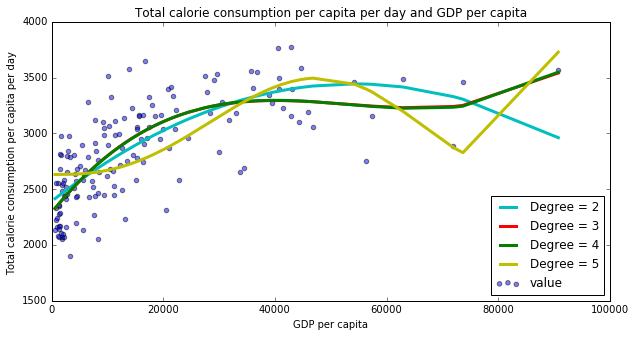

In [164]:
###----------Part 4A: GRAPH1  ----------###
degrees = [2, 3, 4, 5]
colors = ['c', 'r', 'g', 'y']

# Plot data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_1, y_1, alpha = 0.5)

for i in range(len(degrees)):       
    # Fit model and plot predicted y-vals
    ax = fit_and_plot_polynomial(ax, x_1, y_1, degrees[i], colors[i]) 

# Set x, y labels, legend and title
ax.set_title('Total calorie consumption per capita per day and GDP per capita')
ax.set_xlim([0, 100000])
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Total calorie consumption per capita per day ')
ax.legend(loc='best')

plt.show()

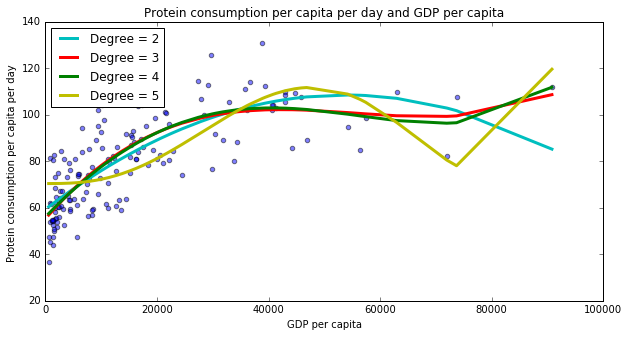

In [165]:
###----------Part 4B: GRAPH 2  ----------###
degrees = [2, 3, 4, 5]
colors = ['c', 'r', 'g', 'y']

# Plot data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_2, y_2, alpha = 0.5)

for i in range(len(degrees)):       
    # Fit model and plot predicted y-vals
    ax = fit_and_plot_polynomial(ax, x_2, y_2, degrees[i], colors[i]) 

# Set x, y labels, legend and title
ax.set_title('Protein consumption per capita per day and GDP per capita')
ax.set_xlim([0, 100000])
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Protein consumption per capita per day ')
ax.legend(loc='best')

plt.show()

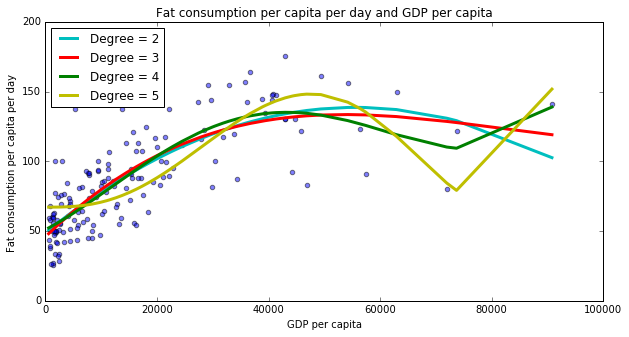

In [166]:
###----------Part 4C: GRAPH 3  ----------###
degrees = [2, 3, 4, 5]
colors = ['c', 'r', 'g', 'y']

# Plot data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_3, y_3, alpha = 0.5)

for i in range(len(degrees)):       
    # Fit model and plot predicted y-vals
    ax = fit_and_plot_polynomial(ax, x_3, y_3, degrees[i], colors[i]) 

# Set x, y labels, legend and title
ax.set_title('Fat consumption per capita per day and GDP per capita')
ax.set_xlim([0, 100000])
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Fat consumption per capita per day ')
ax.legend(loc='best')

plt.show()

In [167]:
###----------Part 5: BUBBLE GRAPHS  ----------###
## Load data
df = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/data_bubbles.csv')
df.head(n=2)

,Domain Code,Domain,AreaCode,ISO,AreaName,ElementCode,ElementName,ItemCode,ItemName,Year,...,GDP.PPP,both cardio,female cardio,male cardio,both cancer,female cancer,male cancer,both diabetes,female diabetes,male diabetes
0,CC,Food Supply - Crops Primary Equivalent,1,ARM,Armenia,664,Food supply (kcal/capita/day),2901,Grand Total,2000,...,2918.557686,415.4,344.1,500.4,209.0,194.8,231.4,32.2,33.6,29.2
1,CC,Food Supply - Crops Primary Equivalent,1,ARM,Armenia,664,Food supply (kcal/capita/day),2903,Vegetal Products,2000,...,2918.557686,415.4,344.1,500.4,209.0,194.8,231.4,32.2,33.6,29.2


In [98]:
###----------Part 5: Bubble chart   ----------#### 
## Correlation between development, diabetes prevalence rates and consumption of calories
## from sugars

#Load Data
df_cal_total = df[df['ItemName'] == 'Sugar & Sweeteners']

In [99]:
## Import plotly library
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('johisrp', 'lojavkqr1u')
import math

## Data preparation
# GDP (proxy of development)
x = df_cal_total['GDP.PPP'][df_cal_total['GDP.PPP'].notnull()].values
# Diabetes prevalence rate
y = df_cal_total['both diabetes'][df_cal_total['both diabetes'].notnull()]
y = y.drop(df_cal_total[df_cal_total['GDP.PPP'].isnull()].index).values
size = df_cal_total['Value'][df_cal_total['Value'].notnull()] 
# Calories from sugars: size of the bubble
size = size.drop(df_cal_total[df_cal_total['GDP.PPP'].isnull()].index).values

# DataFrame for Bubbles Chart
slope = 2.666051223553
data_cardio = pd.DataFrame(np.column_stack([x, y, size]), columns = ['gdp', 'diabetes', \
                                                                     'calories'])
#data_cardio = data_cardio.sort_values(['calories'])
bubble_size = []

# Bubble Chart
for index, row in data_cardio.iterrows():
    bubble_size.append(math.sqrt(row['calories']*slope))
    
data_cardio['size'] = bubble_size

trace0 = go.Scatter(
    x=data_cardio['gdp'],
    y=data_cardio['diabetes'],
    mode='markers',
    marker=dict(
        symbol='circle',
        sizemode='diameter',
        sizeref=0.85,
        size=data_cardio['size'],
        line=dict(
            width=2
        ),
    )
)

data = [trace0]
layout = go.Layout(
    title='Diabetes Prevalence vs Per Capita GDP, 2012. Size of Bubble: Calories from Sugars' ,
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        #gridcolor='rgb(255, 255, 255)',
        #range=[2.003297660701705, 5.191505530708712],
        #type='log',
        #zerolinewidth=1,
        #ticklen=5,
        #gridwidth=2,
    ),
    yaxis=dict(
        title='Diabetes Prevalence',
        #gridcolor='rgb(255, 255, 255)',
        #range=[36.12621671352166, 91.72921793264332],
        #zerolinewidth=1,
        #ticklen=5,
        #gridwidth=2,
    ),
    #paper_bgcolor='rgb(243, 243, 243)',
    #plot_bgcolor='rgb(243, 243, 243)',
)

# Plot GDP, Diabetes Prevalence, Calories from Sugar correlation using a Bubble Chart
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bubblechart-size')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Johisrp/0 or inside your plot.ly account where it is named 'bubblechart-size'


In [10]:
granularfood = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/Foodsupply_all.csv', delimiter=',')
granularfood = granularfood.rename(columns = {'AreaName':'country'})


In [11]:
granularfood.head()

,﻿Domain Code,Domain,AreaCode,country,ElementCode,ElementName,ItemCode,ItemName,Year,Value,Flag,FlagD
0,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1992.0,3449.0,NaN,Official data
1,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1993.0,3370.0,NaN,Official data
2,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1994.0,3290.0,NaN,Official data
3,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1995.0,3223.0,NaN,Official data
4,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1996.0,3173.0,NaN,Official data


In [26]:
granularfoodiso = pd.merge(granularfood, df_iso, on=['country'])
granularfoodiso.head()

,﻿Domain Code,Domain,AreaCode,country,ElementCode,ElementName,ItemCode,ItemName,Year,Value,Flag,FlagD,iso2,iso3
0,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1992.0,3449.0,NaN,Official data,AM,ARM
1,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1993.0,3370.0,NaN,Official data,AM,ARM
2,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1994.0,3290.0,NaN,Official data,AM,ARM
3,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1995.0,3223.0,NaN,Official data,AM,ARM
4,CC,Food Supply - Crops Primary Equivalent,1.0,Armenia,511.0,Total Population - Both sexes,2501.0,Population,1996.0,3173.0,NaN,Official data,AM,ARM


In [31]:
#no missing isos!!
null_data = granularfoodiso[granularfoodiso["iso3"].isnull()]
null_data.shape

(0, 14)